# Example_2_9

Plot the linear SVM frontier

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/OTBD/main/content/init.py
import init; init.init(force_download=False)

In [3]:
from local.lib.Generation import scenarios_classification
from local.lib.utils import solver_cvx, test_phase_class

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#!pip install cvxpy

In [ ]:
import cvxpy as cp

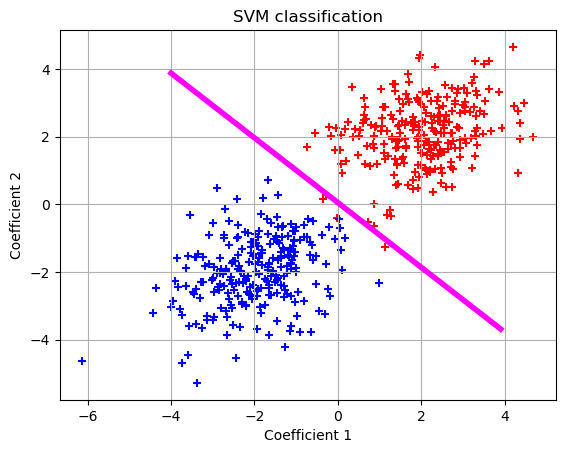

In [6]:
# Loading scenarios
# ===========================
scenario=1;
data_class, set_up =scenarios_classification(scenario);

i1=np.where(set_up['ytrain'][:,0]==1)
i2=np.where(set_up['ytrain'][:,0]==-1)

_, ax = plt.subplots()
ax.scatter(set_up['Xtrain'][i1,0],set_up['Xtrain'][i1,1],marker = '+',color='r',label = 'Class 1')
ax.scatter(set_up['Xtrain'][i2,0],set_up['Xtrain'][i2,1],marker = '+',color='b',label = 'Class 2')

loss_fn = lambda n, X, Y, w: (1/n)*cp.sum(cp.pos(1-cp.multiply(Y,X @ w)))
reg_L2 = lambda w: cp.pnorm(w, p=2)**2
loss_svm_L2 = lambda n, X, Y, w, lambd: loss_fn(n, X, Y, w) + (lambd/2) * reg_L2(w)

# Solution of the empirical risk using CVX.
# =========================================
x_L2_cvx=solver_cvx(set_up,loss_svm_L2)
e_L2_cvx=test_phase_class(set_up,'magenta',x_L2_cvx,ax)
plt.grid()
plt.xlabel('Coefficient 1')
plt.ylabel('Coefficient 2')
plt.title('SVM classification')
plt.show()